In [1]:
import os
import pandas as pd
import sys
import seaborn as sns

In [2]:
root_path = os.path.abspath(os.path.join(os.getcwd(), '../'))
if root_path not in sys.path:
    sys.path.append(root_path)
print(f'Root_path: {root_path}')

Root_path: c:\Users\sylla\Desktop\Projet_perso_Mlops\Telco_Customer_Churn


In [3]:
%pwd

'c:\\Users\\sylla\\Desktop\\Projet_perso_Mlops\\Telco_Customer_Churn\\Notebook_research'

In [4]:
os.chdir(root_path)
%pwd

'c:\\Users\\sylla\\Desktop\\Projet_perso_Mlops\\Telco_Customer_Churn'

In [5]:
df = pd.read_csv('data_churn/Customer_Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

In [9]:
df.loc[df.TotalCharges == ' ', :].shape


(11, 21)

In [10]:
list_value = list(df.loc[df.TotalCharges == ' ', "MonthlyCharges"].values)

In [11]:
df.loc[df.TotalCharges == ' ', ["TotalCharges",'MonthlyCharges']  ].head(7)

,TotalCharges,MonthlyCharges
488,,52.55
753,,20.25
936,,80.85
1082,,25.75
1340,,56.05
3331,,19.85
3826,,25.35


In [12]:
df.loc[df.TotalCharges == ' ', "TotalCharges"] = list_value

### Verification

In [13]:
df.loc[df.TotalCharges.index.isin([488 , 753,936,1082,1340 , 3331 , 
3826 , 4380  , 5218  ,6670 ,6754 ]), ["TotalCharges",'MonthlyCharges']  ].head(7)

,TotalCharges,MonthlyCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35


In [14]:
df.TotalCharges =  df.TotalCharges.astype(float)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


In [16]:
import matplotlib.pyplot as plt

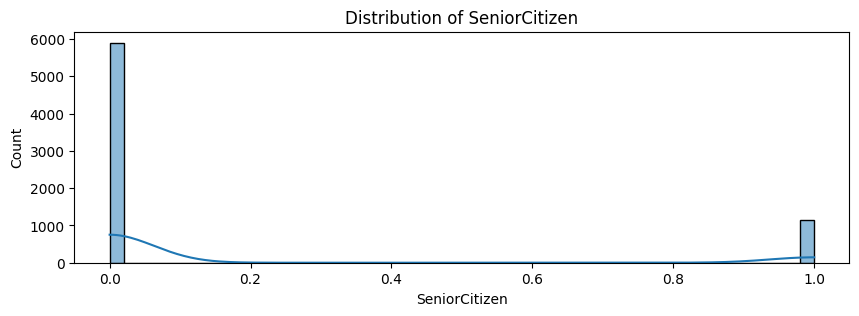

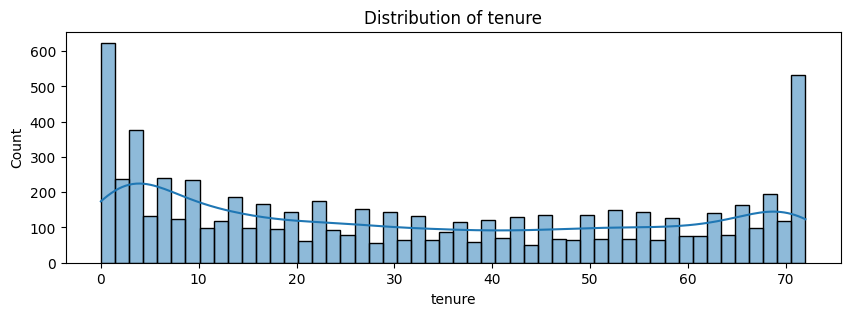

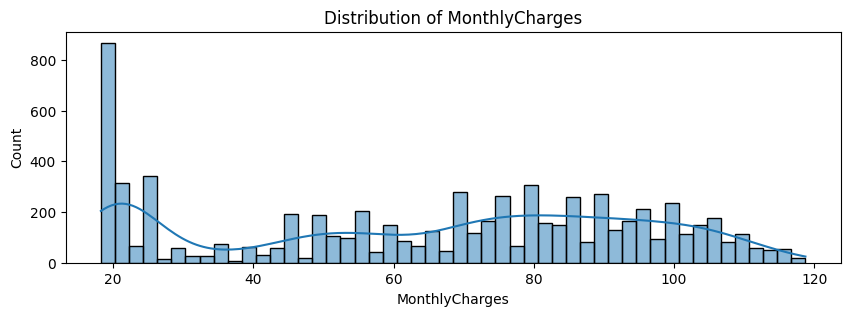

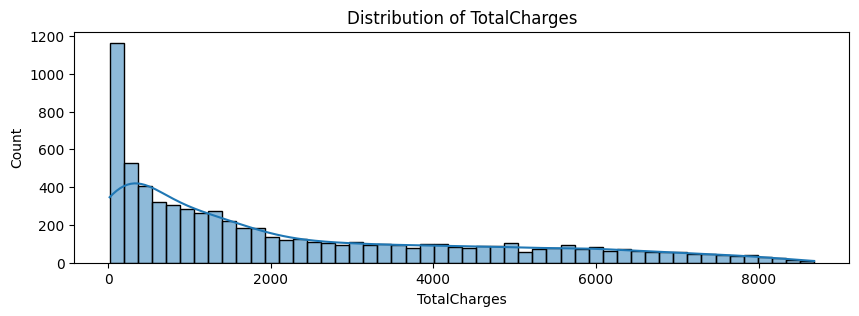

In [17]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

df_num = df[num_cols].copy()
for col in num_cols:
    plt.figure(figsize=(10, 3))
    sns.histplot(data=df_num, x= col, kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()


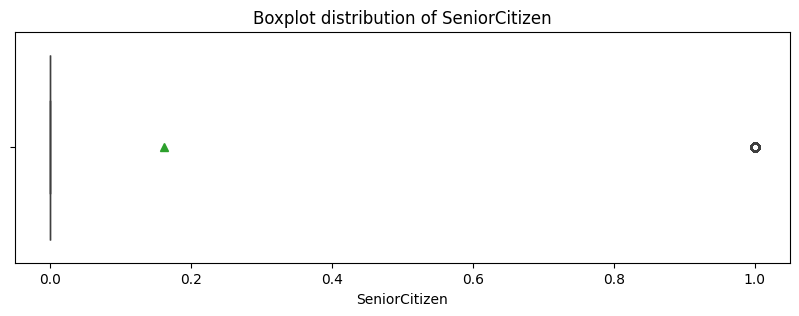

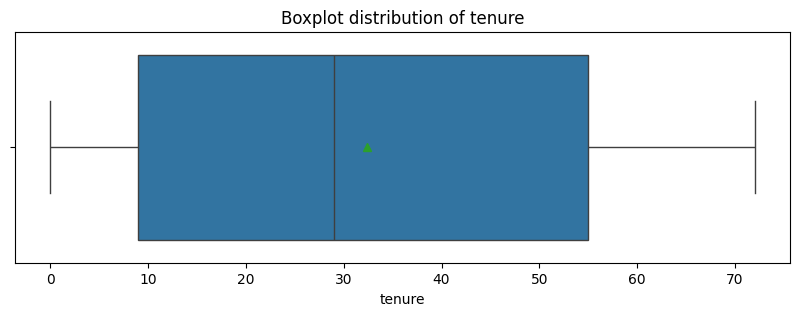

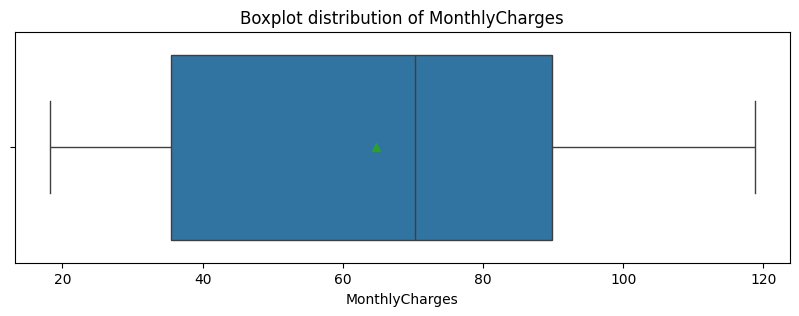

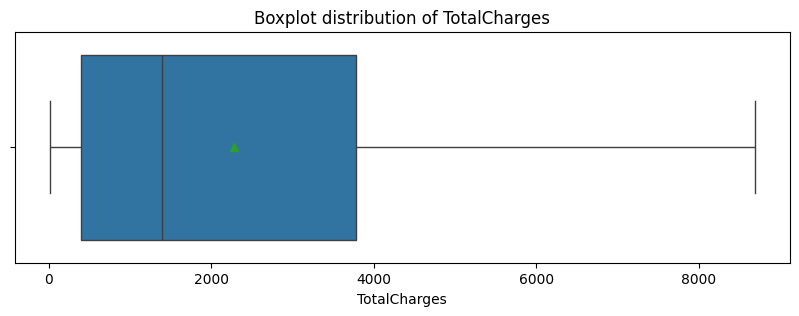

In [18]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

df_num = df[num_cols].copy()
for col in num_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=df_num, x= col, showfliers=True, showmeans=True)
    plt.title(f'Boxplot distribution of {col}')
    plt.show()


In [21]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() < 10:
        print(f" col {col} has values : {df[col].unique()}")
    else:
        print(f'Column {col} has {len(df[col].unique())} unique values')

Column customerID has 7043 unique values
 col gender has values : ['Female' 'Male']
 col Partner has values : ['Yes' 'No']
 col Dependents has values : ['No' 'Yes']
 col PhoneService has values : ['No' 'Yes']
 col MultipleLines has values : ['No phone service' 'No' 'Yes']
 col InternetService has values : ['DSL' 'Fiber optic' 'No']
 col OnlineSecurity has values : ['No' 'Yes' 'No internet service']
 col OnlineBackup has values : ['Yes' 'No' 'No internet service']
 col DeviceProtection has values : ['No' 'Yes' 'No internet service']
 col TechSupport has values : ['No' 'Yes' 'No internet service']
 col StreamingTV has values : ['No' 'Yes' 'No internet service']
 col StreamingMovies has values : ['No' 'Yes' 'No internet service']
 col Contract has values : ['Month-to-month' 'One year' 'Two year']
 col PaperlessBilling has values : ['Yes' 'No']
 col PaymentMethod has values : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 col Churn has values : 